<a href="https://colab.research.google.com/github/dayaniravi123/Machine-Learning-Projects/blob/main/Rain_in_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Implement all required libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


from tensorflow.keras import layers
from keras.regularizers import L1L2
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
path = '/content/drive/MyDrive/Machine Learning - Tensorflow /Rain In AUS/weatherAUS.csv'
path

'/content/drive/MyDrive/Machine Learning - Tensorflow /Rain In AUS/weatherAUS.csv'

In [3]:
## load dataset using pandas library

dataset = pd.read_csv(path)

dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
## Print basic features of dataset like column name, shape etc

print("Features: ",dataset.columns)
print()
print()
print("Dimension:", dataset.shape)


Features:  Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Dimension: (145460, 23)


In [5]:
## Preprocess the dataset
## In the preprocessing first remove all the null values from dataset

df = dataset.dropna()

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


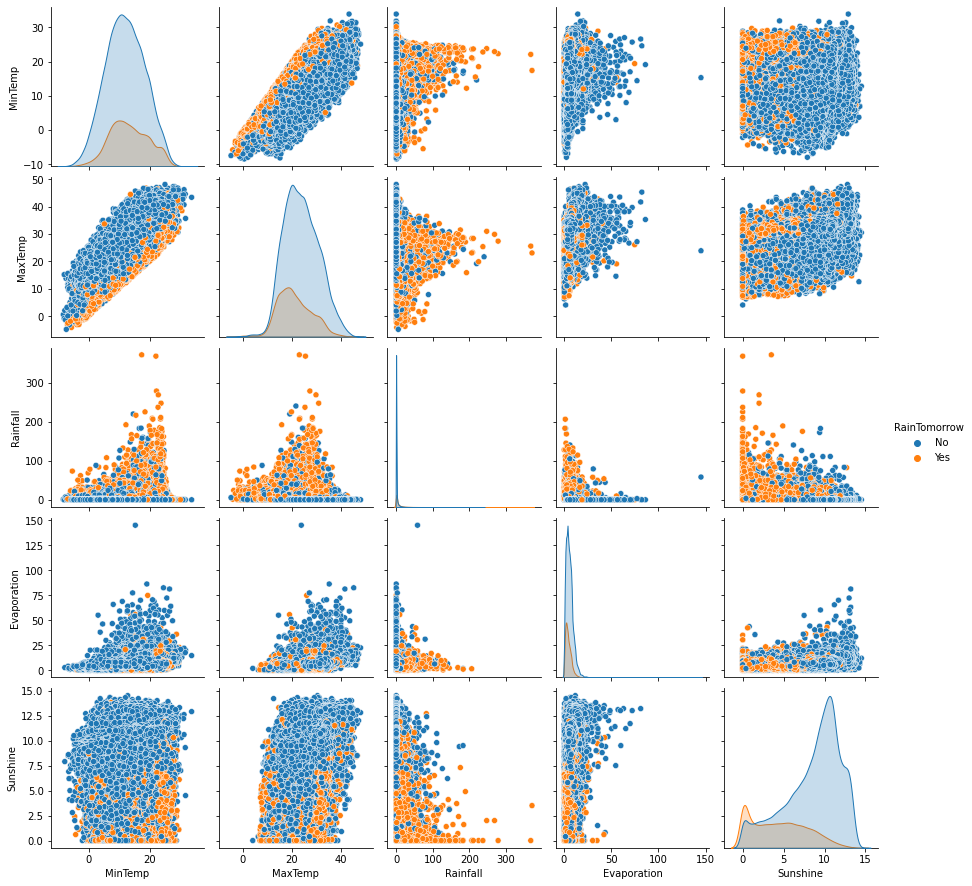

In [6]:
## Plot pairplot graph of specific column and here I consider RainTomorrow column as target variable

## Plot 1

sns.pairplot(dataset[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustDir', 'RainTomorrow']], hue = 'RainTomorrow')

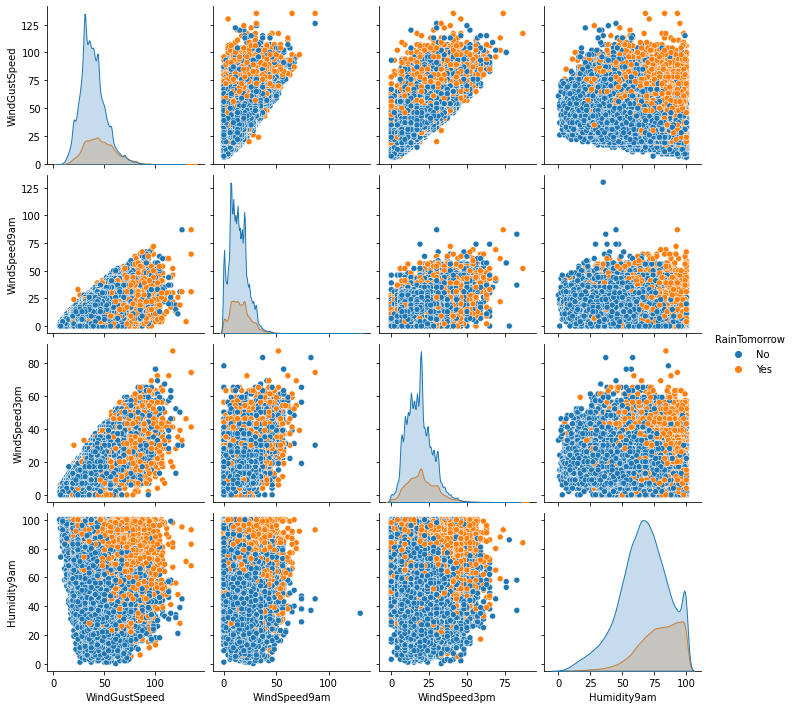

In [7]:
## Plot pairplot graph of specific column and here I consider RainTomorrow column as target variable

## Plot 2

sns.pairplot(dataset[['WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','RainTomorrow']], hue = 'RainTomorrow')

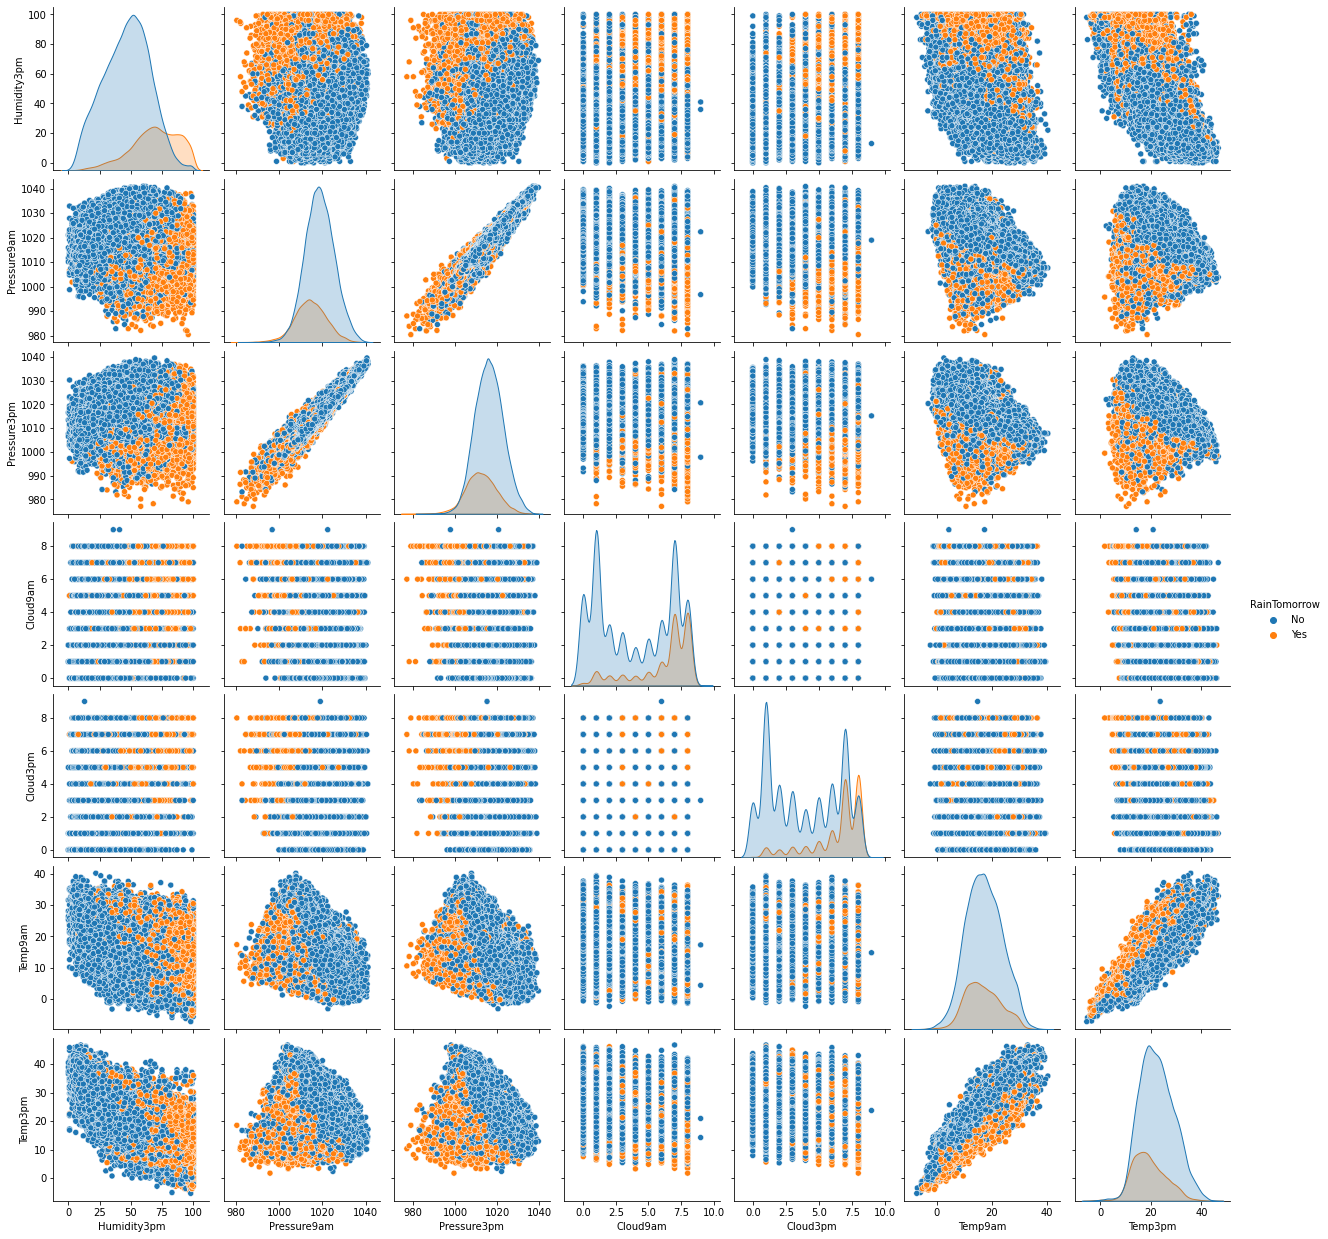

In [8]:
## Plot 3

sns.pairplot(dataset[['Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']], hue = 'RainTomorrow')

In [6]:
#WindGustDir , WindDir9am, WindDir3pm, RainToday, RainTomorrow

## encode all the categorical features of dataset
#dataset.WindGustDir = dataset.WindGustDir.astype('category').cat.codes
#dataset.WindDir9am = dataset.WindDir9am.astype('category').cat.codes
#dataset.WindDir3pm = dataset.WindDir3pm.astype('category').cat.codes
#dataset.RainToday = dataset.RainToday.astype('category').cat.codes
#dataset.RainTomorrow = dataset.RainTomorrow.astype('category').cat.codes


df.WindGustDir = df.WindGustDir.astype('category').cat.codes
df.WindDir9am = df.WindDir9am.astype('category').cat.codes
df.WindDir3pm = df.WindDir3pm.astype('category').cat.codes
df.RainToday = df.RainToday.astype('category').cat.codes
df.RainTomorrow = df.RainTomorrow.astype('category').cat.codes


## find correlation of each features
corr = df.corr()

corr['RainTomorrow']

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


MinTemp          0.087428
MaxTemp         -0.147467
Rainfall         0.254342
Evaporation     -0.130002
Sunshine        -0.453407
WindGustDir      0.061751
WindGustSpeed    0.233158
WindDir9am       0.035992
WindDir3pm       0.032203
WindSpeed9am     0.083904
WindSpeed3pm     0.088862
Humidity9am      0.271033
Humidity3pm      0.455358
Pressure9am     -0.254816
Pressure3pm     -0.230418
Cloud9am         0.323972
Cloud3pm         0.388574
Temp9am         -0.018179
Temp3pm         -0.183586
RainToday        0.309098
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

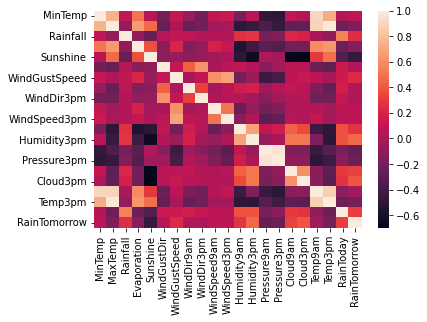

In [7]:
## Implement heat map of dataset

sns.heatmap(corr)

In [8]:
## Build logistic regression model 

Model = tf.keras.models.Sequential([
    layers.Normalization(axis = -1),
    layers.Dense(1, kernel_regularizer = L1L2(l1=0.001, l2=0.0),input_dim = 19, activation='sigmoid'),
    layers.Dense(1, kernel_regularizer = L1L2(l1=0.001, l2=0.0),input_dim = 19, activation='sigmoid')
    
])

In [9]:
## Split dataset into train and test dataset

#X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :20], dataset.iloc[:, 20], test_size= 0.3, random_state = 25)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 2:22], df.iloc[:, 22], test_size= 0.3, random_state = 25)


print("Train dataset shape : ",X_train.shape)

print("Test dataset shape : ",X_test.shape)


Train dataset shape :  (39494, 20)
Test dataset shape :  (16926, 20)


In [10]:
## Compile machine learning model

Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [11]:
## Train model

history = Model.fit(
    X_train, y_train, epochs = 50, validation_split = 0.2
)

Epoch 1/50
988/988 [==============================] - 3s 2ms/step - loss: 0.6077 - accuracy: 0.7805 - val_loss: 0.5508 - val_accuracy: 0.7830
Epoch 2/50
988/988 [==============================] - 2s 2ms/step - loss: 0.5353 - accuracy: 0.7805 - val_loss: 0.5235 - val_accuracy: 0.7830
Epoch 3/50
988/988 [==============================] - 2s 2ms/step - loss: 0.5279 - accuracy: 0.7805 - val_loss: 0.5243 - val_accuracy: 0.7830
Epoch 4/50
988/988 [==============================] - 2s 2ms/step - loss: 0.5270 - accuracy: 0.7805 - val_loss: 0.5232 - val_accuracy: 0.7830
Epoch 5/50
988/988 [==============================] - 2s 2ms/step - loss: 0.5266 - accuracy: 0.7805 - val_loss: 0.5233 - val_accuracy: 0.7830
Epoch 6/50
988/988 [==============================] - 2s 2ms/step - loss: 0.5264 - accuracy: 0.7805 - val_loss: 0.5231 - val_accuracy: 0.7830
Epoch 7/50
988/988 [==============================] - 2s 2ms/step - loss: 0.5264 - accuracy: 0.7805 - val_loss: 0.5231 - val_accuracy: 0.7830
Epoch 

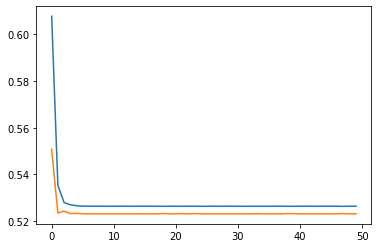

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [13]:
## MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp3pm, RainToday

#df = df[['MaxTemp','Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']]
df = df[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']]


df

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
6049,0.0,12.3,48.0,20.0,13.0,1006.3,1004.4,2.0,5.0,0,0
6050,0.0,13.0,37.0,30.0,8.0,1012.9,1012.1,1.0,1.0,0,0
6052,0.0,10.6,46.0,42.0,22.0,1012.3,1009.2,1.0,6.0,0,0
6053,0.0,12.2,31.0,37.0,22.0,1012.7,1009.1,1.0,5.0,0,0
6054,0.0,8.4,35.0,19.0,15.0,1010.7,1007.4,1.0,6.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
142298,0.0,11.0,35.0,63.0,32.0,1013.9,1010.5,0.0,1.0,0,0
142299,0.0,8.6,37.0,56.0,28.0,1014.6,1011.2,7.0,0.0,0,0
142300,0.0,11.0,33.0,46.0,23.0,1015.3,1011.8,0.0,0.0,0,0
142301,0.0,10.6,26.0,62.0,58.0,1014.9,1010.7,1.0,1.0,0,0


In [63]:
## Build logistic regression model 

Model = tf.keras.models.Sequential([
    layers.Normalization(axis = -1),
    layers.Dense(32, kernel_regularizer = L1L2(l1=0.001, l2=0.0),input_dim = 11, activation='sigmoid'),
    layers.Dense(64, kernel_regularizer = L1L2(l1=0.001, l2=0.0),input_dim = 11, activation='sigmoid'),
    layers.Dense(1, kernel_regularizer = L1L2(l1=0.01, l2=0.0),input_dim = 11, activation='sigmoid')
    
])

In [64]:
## Split dataset into train and test dataset


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :10], df.iloc[:, 10], test_size= 0.25, random_state = 5, stratify=df.iloc[:, 10])



In [65]:
## Compile machine learning model

Model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [66]:
## Train model

history = Model.fit(
    X_train, y_train, epochs = 10, validation_split = 0.2
)

Epoch 1/10
1058/1058 [==============================] - 3s 2ms/step - loss: 0.5846 - accuracy: 0.7793 - val_loss: 0.5410 - val_accuracy: 0.7814
Epoch 2/10
1058/1058 [==============================] - 2s 2ms/step - loss: 0.4901 - accuracy: 0.8292 - val_loss: 0.4866 - val_accuracy: 0.8420
Epoch 3/10
1058/1058 [==============================] - 2s 2ms/step - loss: 0.4845 - accuracy: 0.8390 - val_loss: 0.4728 - val_accuracy: 0.8425
Epoch 4/10
1058/1058 [==============================] - 2s 2ms/step - loss: 0.4809 - accuracy: 0.8392 - val_loss: 0.4841 - val_accuracy: 0.8427
Epoch 5/10
1058/1058 [==============================] - 3s 2ms/step - loss: 0.4736 - accuracy: 0.8404 - val_loss: 0.4665 - val_accuracy: 0.8408
Epoch 6/10
1058/1058 [==============================] - 2s 2ms/step - loss: 0.4702 - accuracy: 0.8395 - val_loss: 0.4787 - val_accuracy: 0.8340
Epoch 7/10
1058/1058 [==============================] - 3s 3ms/step - loss: 0.4672 - accuracy: 0.8393 - val_loss: 0.4660 - val_accuracy:

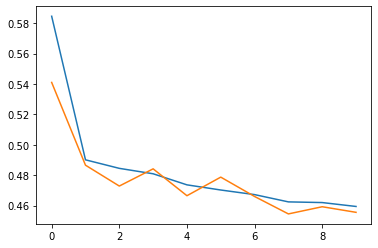

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])

In [68]:
## Prediction on test dataset

y_pred = Model.predict(X_test)

y_pred

array([[0.07028526],
       [0.07654917],
       [0.15103203],
       ...,
       [0.12380233],
       [0.0710592 ],
       [0.57552713]], dtype=float32)

(array([12615.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1490.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

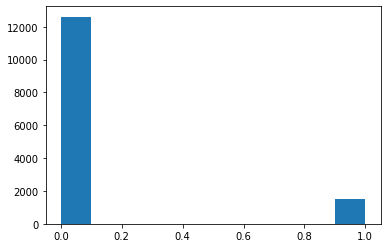

In [69]:
y_pred_class = []
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred_class.append(1)
  else:
    y_pred_class.append(0)

plt.hist(y_pred_class)

In [70]:
## Calculating confusion metrix

confusionMatrix = confusion_matrix(y_test, y_pred_class)
confusionMatrix

array([[10699,   299],
       [ 1916,  1191]])

In [71]:
acc = (confusionMatrix[0][0] + confusionMatrix[1][1])/(sum(confusionMatrix[0]) + sum(confusionMatrix[1]))
acc

0.8429634881247784

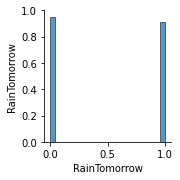

In [100]:
## SMOTE Analysis

temp_X_train, temp_y_train = ADASYN().fit_resample(X_train, y_train)

sns.pairplot(pd.DataFrame(temp_y_train))

In [89]:
history = Model.fit(
    temp_X_train, temp_y_train, epochs = 15, validation_split = 0.3
)

Epoch 1/15
1412/1412 [==============================] - 3s 2ms/step - loss: 0.5028 - accuracy: 0.8026 - val_loss: 1.3607 - val_accuracy: 0.4106
Epoch 2/15
1412/1412 [==============================] - 3s 2ms/step - loss: 0.5004 - accuracy: 0.8012 - val_loss: 0.9178 - val_accuracy: 0.7148
Epoch 3/15
1412/1412 [==============================] - 4s 3ms/step - loss: 0.5003 - accuracy: 0.8016 - val_loss: 1.4912 - val_accuracy: 0.1920
Epoch 4/15
1412/1412 [==============================] - 4s 3ms/step - loss: 0.4966 - accuracy: 0.8036 - val_loss: 0.9779 - val_accuracy: 0.5877
Epoch 5/15
1412/1412 [==============================] - 4s 3ms/step - loss: 0.4976 - accuracy: 0.8019 - val_loss: 1.2516 - val_accuracy: 0.3690
Epoch 6/15
1412/1412 [==============================] - 3s 2ms/step - loss: 0.4967 - accuracy: 0.8036 - val_loss: 0.8409 - val_accuracy: 0.5566
Epoch 7/15
1412/1412 [==============================] - 3s 2ms/step - loss: 0.4965 - accuracy: 0.8025 - val_loss: 1.1996 - val_accuracy:

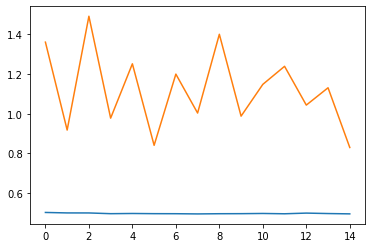

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])

In [20]:
## Clean dataset 

print(dataset.columns)
dataset['WindDir9am'].isna().sum()

for i in dataset.columns:
  print(i,dataset[i].isna().sum())

## fill null values with mean value of same column

df = dataset.copy()
df = df.drop(columns = ['Date','Location'])

#df = df.astype('float')
df.WindGustDir = df.WindGustDir.astype('category').cat.codes
df.WindDir9am = df.WindDir9am.astype('category').cat.codes
df.WindDir3pm = df.WindDir3pm.astype('category').cat.codes
df.RainToday = df.RainToday.astype('category').cat.codes
df.RainTomorrow = df.RainTomorrow.astype('category').cat.codes




for i in df.columns:
  df[i].fillna(int(df[i].mean()), inplace = True)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
Date 0
Location 0
MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustDir 10326
WindGustSpeed 10263
WindDir9am 10566
WindDir3pm 4228
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 3261
RainTomorrow 3267


In [ ]:
## Fit model on processed dataset